<a href="https://colab.research.google.com/github/nk755799/IDS/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# import dataset
dataframe= pd.read_csv("https://raw.githubusercontent.com/nk755799/IDS/main/HW7/dermatology.csv")
dataframe

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [11]:
dataframe.shape

(366, 35)

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [13]:
# check null values
dataframe.isnull().sum().sum()

8

In [14]:
dataframe.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Age has 8 null values

In [15]:
dataframe['age'].fillna(value=dataframe['age'].mean(), inplace=True)

#df = df.fillna(df.mean())
dataframe.isnull().sum().sum()

0

In [16]:
#Get correlation matrix
corr_matrix = dataframe.corr()
corr_matrix['class'].sort_values(ascending=False)

class                                       1.000000
fibrosis_of_the_papillary_dermis            0.526976
follicular_papules                          0.477813
perifollicular_parakeratosis                0.457025
follicular_horn_plug                        0.431972
exocytosis                                  0.283433
spongiosis                                  0.213401
focal_hypergranulosis                       0.063241
saw-tooth_appearance_of_retes               0.060444
polygonal_papules                           0.057785
melanin_incontinence                        0.057394
band-like_infiltrate                        0.057266
oral_mucosal_involvement                    0.055805
vacuolisation_and_damage_of_basal_layer     0.055402
itching                                     0.054772
inflammatory_monoluclear_inflitrate        -0.020402
hyperkeratosis                             -0.054428
eosinophils_in_the_infiltrate              -0.062323
acanthosis                                 -0.

#Highest corrlate feature:
* fibrosis_of_the_papillary_dermis            0.526976
* follicular_papules                          0.477813
* perifollicular_parakeratosis                0.457025
* follicular_horn_plug                        0.431972
* exocytosis                                  0.283433

In [17]:
top_features = ['fibrosis_of_the_papillary_dermis','follicular_papules','perifollicular_parakeratosis','follicular_horn_plug','exocytosis']

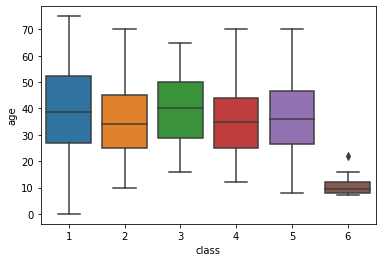

In [18]:
sns.boxplot(data=dataframe,y='age',x='class')

Continengency table

In [19]:
for name in top_features:
  continency_table = pd.crosstab(dataframe['class'],[dataframe[name]])
  print(continency_table)

fibrosis_of_the_papillary_dermis    0  1   2   3
class                                           
1                                 112  0   0   0
2                                  61  0   0   0
3                                  70  0   2   0
4                                  49  0   0   0
5                                   0  8  21  23
6                                  20  0   0   0
follicular_papules    0  1   2  3
class                            
1                   109  2   1  0
2                    60  1   0  0
3                    72  0   0  0
4                    49  0   0  0
5                    43  6   3  0
6                     0  2  12  6
perifollicular_parakeratosis    0  1   2  3
class                                      
1                             112  0   0  0
2                              60  1   0  0
3                              72  0   0  0
4                              49  0   0  0
5                              52  0   0  0
6                           

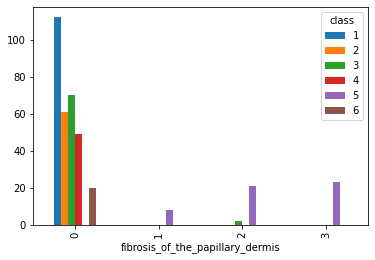

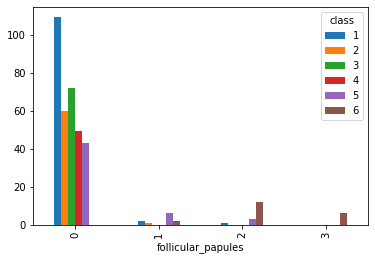

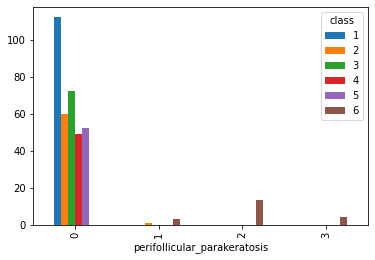

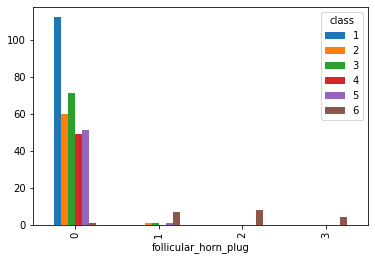

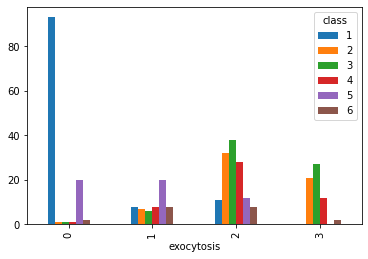

In [20]:
for name in top_features:
  continency_lpot = pd.crosstab(index=[dataframe[name]],columns=dataframe['class'])
  continency_lpot.plot(kind='bar')

In [21]:
# create a new column
dataframe['disease_1'] = dataframe.loc[dataframe["class"] ==1, "class"]
dataframe['disease_1'].fillna(0, inplace=True)
dataframe.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class,disease_1
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55.0,2,0.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8.0,1,1.0
2,2,1,2,3,1,3,0,3,0,0,...,2,3,2,0,0,2,3,26.0,3,0.0
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40.0,1,1.0
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45.0,3,0.0


linear

In [22]:
#build a linear regression model
lr_model = LinearRegression()
x = dataframe['age'].values.reshape(-1,1)
y = dataframe['disease_1'].values.reshape(-1,1)
lr_model.fit(x,y)
y_pred = lr_model.predict(x)
lr_accuracy_score = r2_score(y, y_pred)
print('intercept_:',lr_model.intercept_[0])
print('coef', lr_model.coef_[0][0])
print('R2 score:',           lr_accuracy_score)
print('Mean squared error:', mean_squared_error(y, y_pred))

intercept_: 0.15789148358509988
coef 0.0040808651258150115
R2 score: 0.017962960780911086
Mean squared error: 0.208553477945778


In [23]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(lr_model, x, y, cv=3)
cross_validation.mean()

-0.01036201994585928

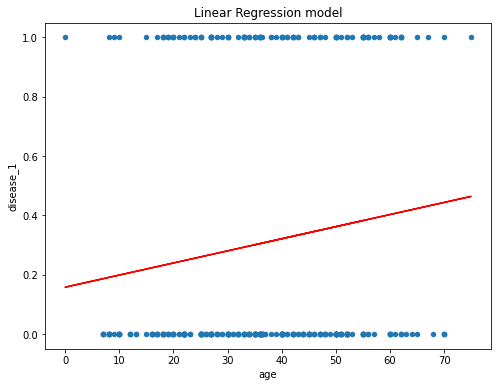

In [24]:
dataframe.plot(kind='scatter', x='age', y='disease_1', figsize=(8, 6))
plt.plot(x, lr_model.intercept_ + lr_model.coef_*x, "r")
plt.title("Linear Regression model")
plt.show()

NB classifier

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

X = dataframe[top_features]
y = dataframe['disease_1']

nb_model = GaussianNB()
nb_model.fit(X,y)

pred_nb_model = nb_model.predict(X)
r2_nb_model = r2_score(y, pred_nb_model)
mse_nb_model = mean_squared_error(y, pred_nb_model)
accuracy_score_nb_model = accuracy_score(y, pred_nb_model)
print('r2 score : ',r2_nb_model)
print('MSE:',mse_nb_model)
print('Accuracy_score for NB model :',accuracy_score_nb_model)

r2 score :  -1.302938695163105
MSE: 0.4890710382513661
Accuracy_score for NB model : 0.5109289617486339


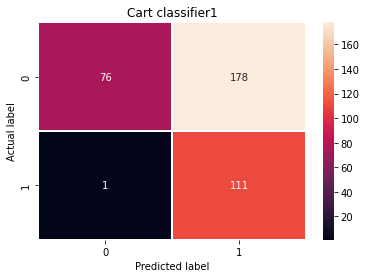

In [26]:
cm = confusion_matrix(y,pred_nb_model)
sns.heatmap(cm, annot=True, linewidths=.5,fmt='0.4g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Cart classifier1")
plt.show()

In [27]:
cross_validation_NB = cross_val_score(nb_model, X, y, cv=3)
cross_validation_NB.mean()

0.5081967213114754

Decison tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = dataframe.drop(['class','disease_1'],axis=1)
y = dataframe['class']

dt_entropy = DecisionTreeClassifier(criterion="entropy",random_state = 120,max_depth=5,max_leaf_nodes=5).fit(X,y)

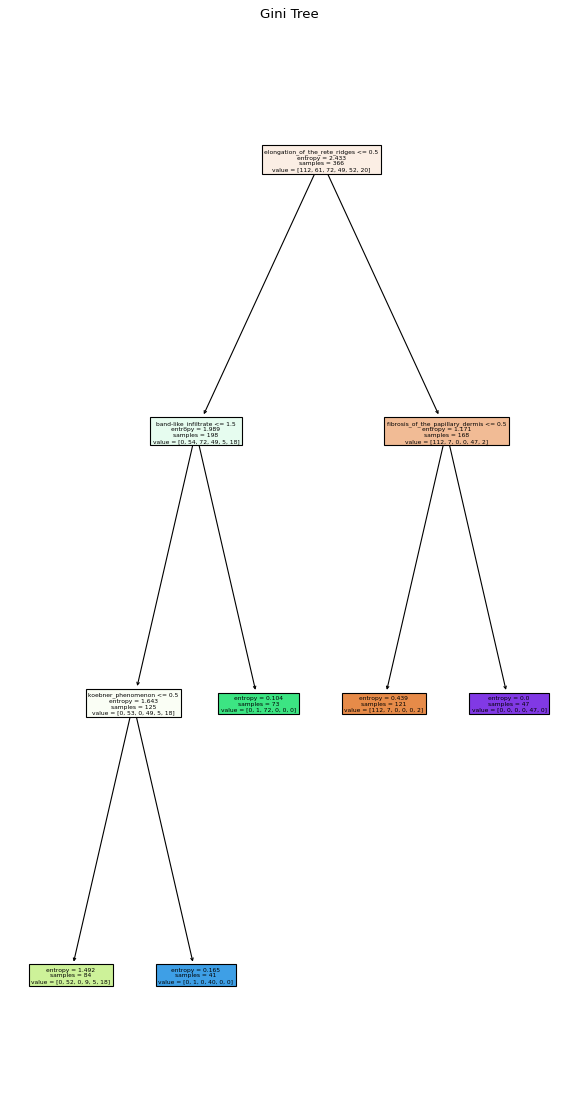

In [29]:
plt.figure(figsize=(20, 18), dpi=80)
plt.subplot(1,2,1)
tree.plot_tree(dt_entropy, feature_names=X.columns.values.tolist(),filled = True)
plt.title("Gini Tree")
plt.show()

Text(0.5, 1.0, 'Cart classifier1')

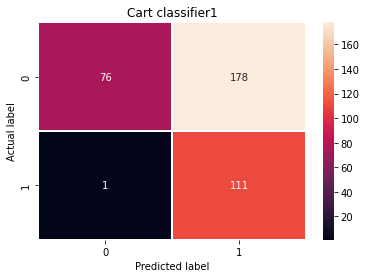

In [30]:
predictions = dt_entropy.predict(X)
sns.heatmap(cm, annot=True, linewidths=.5, fmt='0.4g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Cart classifier1")

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
decision_tree_score = accuracy_score(y, predictions)
print('decision_tree_score ',decision_tree_score)

decision_tree_score  0.8825136612021858


In [32]:
cross_validation = cross_val_score(dt_entropy, X, y, cv=3)
cross_validation.mean()

0.8278688524590164

# Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

X = dataframe.drop(['class'],axis=1)
y = dataframe['class']

randomForest_model = RandomForestClassifier()
randomForest_model.fit(X,y)


RandomForestClassifier()

[Text(0.5425, 0.9583333333333334, 'melanin_incontinence <= 0.5\ngini = 0.802\nsamples = 238\nvalue = [103, 62, 82, 45, 55, 19]'),
 Text(0.5025, 0.875, 'fibrosis_of_the_papillary_dermis <= 0.5\ngini = 0.755\nsamples = 185\nvalue = [103, 62, 1, 45, 55, 19]'),
 Text(0.305, 0.7916666666666666, 'spongiosis <= 0.5\ngini = 0.679\nsamples = 150\nvalue = [103, 62, 0, 45, 0, 19]'),
 Text(0.16, 0.7083333333333334, 'perifollicular_parakeratosis <= 0.5\ngini = 0.232\nsamples = 78\nvalue = [103, 7, 0, 4, 0, 4]'),
 Text(0.12, 0.625, 'exocytosis <= 0.5\ngini = 0.179\nsamples = 74\nvalue = [103, 7, 0, 4, 0, 0]'),
 Text(0.08, 0.5416666666666666, 'gini = 0.0\nsamples = 58\nvalue = [84, 0, 0, 0, 0, 0]'),
 Text(0.16, 0.5416666666666666, 'definite_borders <= 1.5\ngini = 0.527\nsamples = 16\nvalue = [19, 7, 0, 4, 0, 0]'),
 Text(0.12, 0.4583333333333333, 'hyperkeratosis <= 1.5\ngini = 0.542\nsamples = 6\nvalue = [1, 7, 0, 4, 0, 0]'),
 Text(0.08, 0.375, 'hyperkeratosis <= 0.5\ngini = 0.463\nsamples = 5\nvalue 

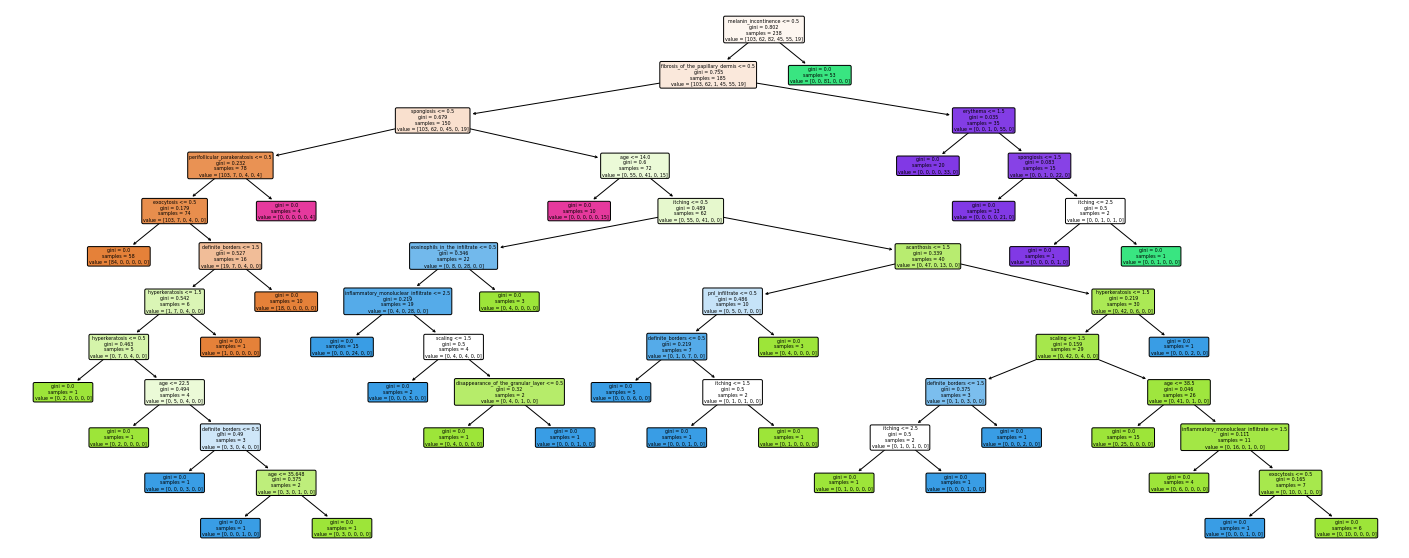

In [34]:
fig = plt.figure(figsize=(25, 10))
plot_tree(randomForest_model.estimators_[0], feature_names=X.keys(),filled=True, impurity=True, rounded=True)

Text(0.5, 1.0, 'Cart classifier1')

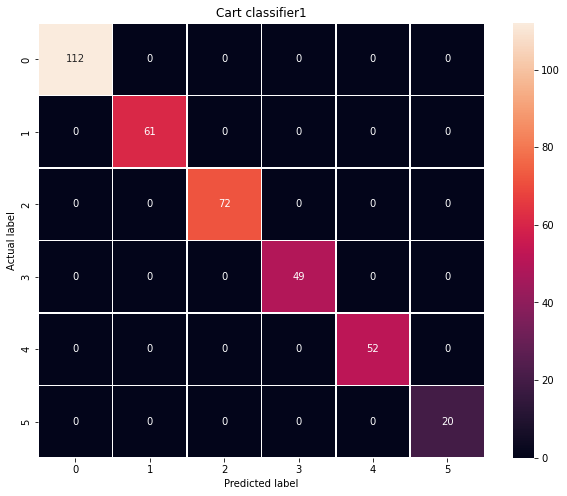

In [35]:
rfc_cm = confusion_matrix(y, randomForest_model.predict(X))

plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm, annot=True, linewidths=.5, fmt='0.4g');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Cart classifier1")

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
random_forest_score = accuracy_score(y,randomForest_model.predict(X))
random_forest_score

1.0

In [37]:
randomForest_cross_validation = cross_val_score(randomForest_model, X, y, cv=3)
randomForest_cross_validation.mean()

0.9726775956284152

.featureimportances

Text(0.5, 0, 'Relative Importance')

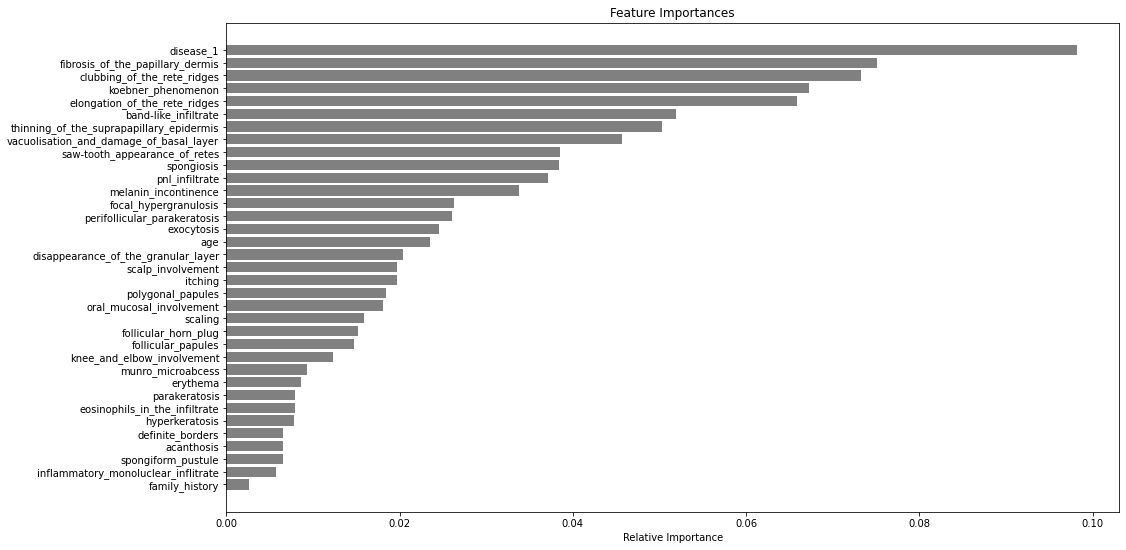

In [38]:
plt.figure(figsize=(16,9))
features=X.keys()
importances = randomForest_model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='gray', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# summary

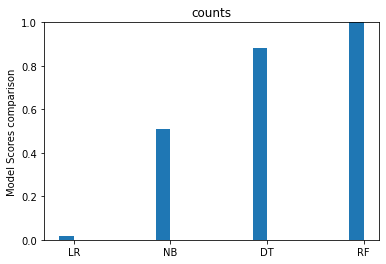

In [39]:
#Compare models
labels = ['LR', 'NB', 'DT', 'RF']
model_scores = [lr_accuracy_score, accuracy_score_nb_model, decision_tree_score, random_forest_score]

x = np.arange(len(labels))
width = 0.15
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model_scores, width, label='Model Scores')
ax.set_ylabel('Model Scores comparison')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
plt.title('counts')
plt.show()